# Tarea N°3


<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning: Laboratorio 03
*12 de Octubre de 2024*

**Nombre Estudiante(s)**: `Gabriel Álvarez Martínez - Valeska Farías Caicedo - Constanza Perez Pulido - Rosario Valderrama Labarca


## 1. Objetivo

En este laboratorio deberá *aplicar* los algoritmos aprendidos en la clase e investigar del uso de la libreria python scikit-learn y sus funciones más útiles para estos métodos. Su meta es realizar un análisis de datos completo probando los distintos métodos supervisados vistos hasta ahora (Naive Bayes, Análisis de Discriminante, Regresión Logística).

Para esto utilizará la base load_breast_cancer anteriormente utilizada. Además los siguientes comandos de la librería sklearn, para la siguiente base:

```
# X, y =fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X.drop(['boat', 'body', 'home.dest'], axis=1, inplace=Tru```
```

Por último, nos gustaría saber el destino de los dos pasajeros de los cuales se presentan sus boletos en el Titanic. También, nos interesa entender si la edad es un elemento determinante para la sobrevida.

## 2. Introducción  

En el presente laboratorio se utilizaron dos dataframe:

- load_breast_cancer, con el cual se pretende entrenar un modelo para predecir si el tumor de un paciente es maligno o benigno.
- titanic, cel este df se desea predecir si los pasajeros sobreviven o no.

Para lograr lo anterior, se utilizaron algoritmos de clasificación supervisados, para eso se utilizará Análisis de Discriminante Lineal (LDA) con el primer df (load_breast_cancer) y se realizará una regresión lineal además de  Naive Bayes para el df Titanic.

Adcionalmente, se desea conocer el destino de dos pasajeros en específico que mantienen las siguientes caracteristicas según su ticket de embarque:  

Pasajero N°1:  

  - Nombre: Miss Helene ragnhild Ostby
  - Sexo: Femenino
  - Edad: 22 años
  - Clase en la que viaja: 1ra. clase
  - Cabin: B-36
  - Embarque: Cherbourg  

Pasajero N°2:  
  - Nombre: Mr. Frederick Edward Giles
  - Sexo: Masculino
  - Edad: 21
  - Clase en la que viaja: 2da. clase
  - Cabin: Desconocida
  - Embarque: Southampton  

Para predecir si los dos pasajeros indicados sobreviven o no, se utiliza un árbol de clasificación que será entrenado para identificar las caracteristicas de los pasajeros que sobreviven y los que no, luego de eso podremos determinar el destino de ambos. el destino de ambos.

## 3. Importación de paquetes

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

## 4. Obtención del Dataset

### 4.1. load_brest_cancer

Detalles del dataset:  

El data frame contiene 569 filas con datos de pacientes con tumores, los cuales, pueden ser malignos o benignos, esto se determina según las caracteristicas del tumor que están descritas en distintas variables, como "promedio del radio", "promedio de la textura", "promedio del perimetro", entre otras.

Sus variables están conformadas por 30 características numéricas que describen las propiedades de los núcleos celulares presentes en una imagen digitalizada de un tumor. Se pretende determinar si el tumor es maligno o benigno.

Contiene: 
- Número de registros: 569.
- target: 0 si es maligno y 1 si es benigno.

In [16]:
df_cancer = pd.DataFrame(load_breast_cancer().data,columns = load_breast_cancer().feature_names)

Las variables son las siguientes:

In [17]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [18]:
# Verificar si hay valores nulos en el DataFrame
null_counts = df_cancer.isnull().sum()

# Mostrar las columnas que tienen valores nulos
print("Conteo de valores nulos por columna:")
print(null_counts[null_counts > 0])

Conteo de valores nulos por columna:
Series([], dtype: int64)


Verificamos la no existencia de valores nulos.  

A continuación se presentan algunos datos descriptivos:

In [19]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Se debe preparar el dataframe para aplicar los algoritmos.

In [20]:
# Añadir la columna de la etiqueta (maligno o benigno) al DataFrame
df_cancer['target'] = load_breast_cancer().target

# Dividir las características (X) y la etiqueta (y)
X_cancer = df_cancer.drop('target', axis=1)
y_cancer = df_cancer['target']

# MÉTODOS SUPERVISADOS

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

# Análisis de Discriminante con load_breast_cancer

In [22]:

#se entrena el modelo
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular la precisión (accuracy) y el recall
accuracy_cancer_lda = accuracy_score(y_test, y_pred)
recall_cancer_lda = recall_score(y_test, y_pred)

print(f"Exactitud del modelo (LDA): {accuracy_cancer_lda:.4f}")
print(f"Recall del modelo (LDA): {recall_cancer_lda:.4f}")



Exactitud del modelo (LDA): 0.9561
Recall del modelo (LDA): 0.9859


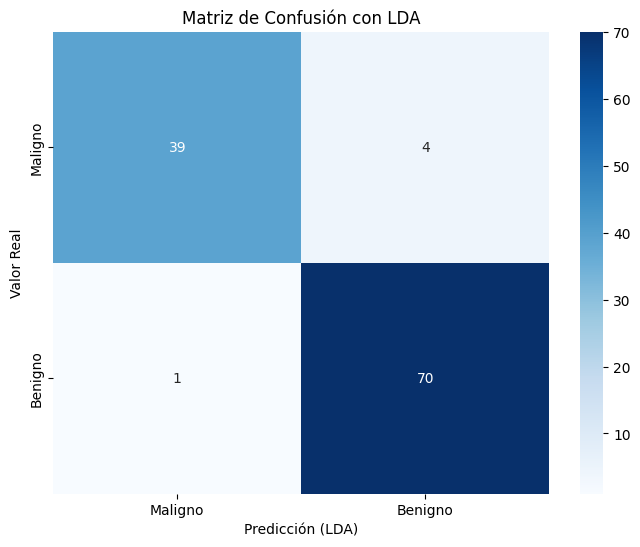

In [23]:
######################################
# Calcular la matriz de confusión
conf_matrix_cancer_lda = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_cancer_lda, annot=True, fmt='d', cmap='Blues', xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción (LDA)')
plt.title('Matriz de Confusión con LDA')
plt.show()

# *Incluir interpretación de LDA*

# Naive Bayes

In [24]:
# Entrenar un modelo de Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular la precisión (accuracy) y el recall
accuracy_cancer_nb = accuracy_score(y_test, y_pred)
recall_cancer_nb = recall_score(y_test, y_pred)

print(f"Exactitud del modelo (Naive Bayes): {accuracy_cancer_nb:.4f}")
print(f"Recall del modelo (Naive Bayes): {recall_cancer_nb:.4f}")


Exactitud del modelo (Naive Bayes): 0.9737
Recall del modelo (Naive Bayes): 1.0000


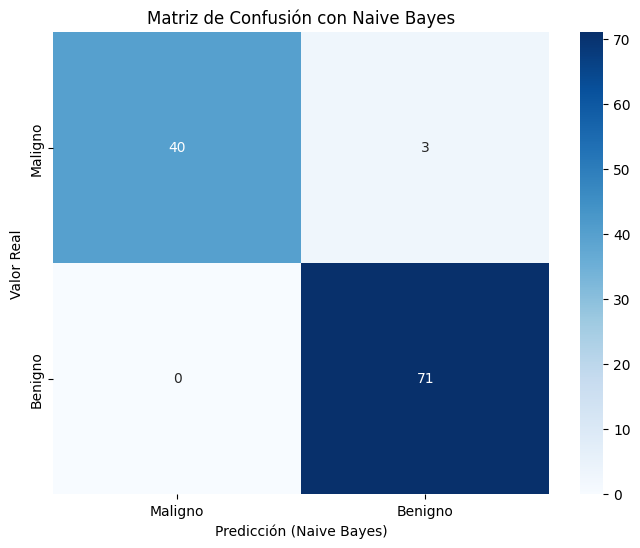

In [25]:
# Calcular la matriz de confusión
conf_matrix_cancer_nb = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_cancer_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción (Naive Bayes)')
plt.title('Matriz de Confusión con Naive Bayes')
plt.show()

## KMeans (lo dejo porque el enunciado dice que hay que hacer al menos un metodo no supervisado)

In [26]:

# Escalar las características (importante para K-means)
scaler2 = StandardScaler()
X2_scaled2 = scaler2.fit_transform(X_cancer)

# Aplicar K-means
kmeans = KMeans(n_clusters=2, random_state=42) #2 cluster (benigno o no maligno)
y_pred_kmeans = kmeans.fit_predict(X2_scaled2)

In [27]:
# Calcular la precisión (accuracy) y el recall
accuracy_km = accuracy_score(y_cancer, y_pred_kmeans)
recall_km = recall_score(y_cancer, y_pred_kmeans)

print(f"Exactitud del modelo (K-means): {accuracy_km:.4f}")
print(f"Recall del modelo (K-means): {recall_km:.4f}")

Exactitud del modelo (K-means): 0.9121
Recall del modelo (K-means): 0.9636


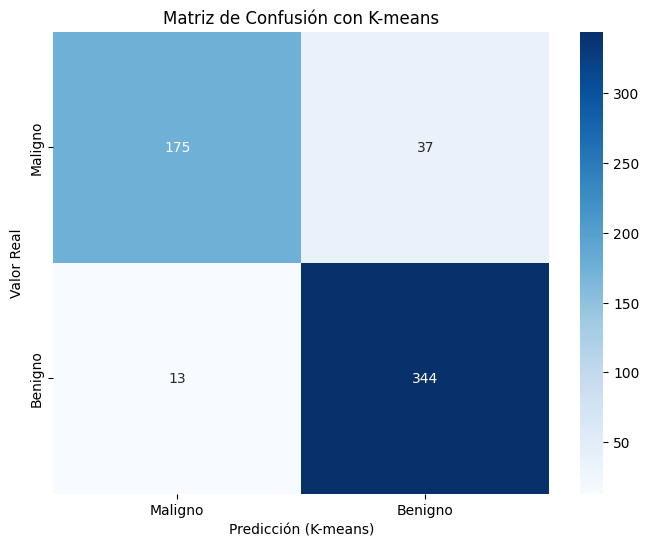

In [28]:
# Calcular la matriz de confusión
conf_matrix_cancer_km = confusion_matrix(y_cancer, y_pred_kmeans)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_cancer_km, annot=True, fmt='d', cmap='Blues', xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción (K-means)')
plt.title('Matriz de Confusión con K-means')
plt.show()
